<a href="https://colab.research.google.com/github/CaptainRoi3435/my_own_set/blob/main/logica_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SET es un juego de 81 cartas distintas donde cada carta tiene cuatro cualidades, número, color, forma y relleno, donde cada caracteristica tiene 3 opciones, las cuales son:



*   Color: Morado, rojo y verde
*   Número: uno, dos y tres
*   Forma: Ovalo, rombo y flecha (En el juego original es una S)
*   Relleno: Sólido, rayado y sin relleno

**Ejemplo 1**

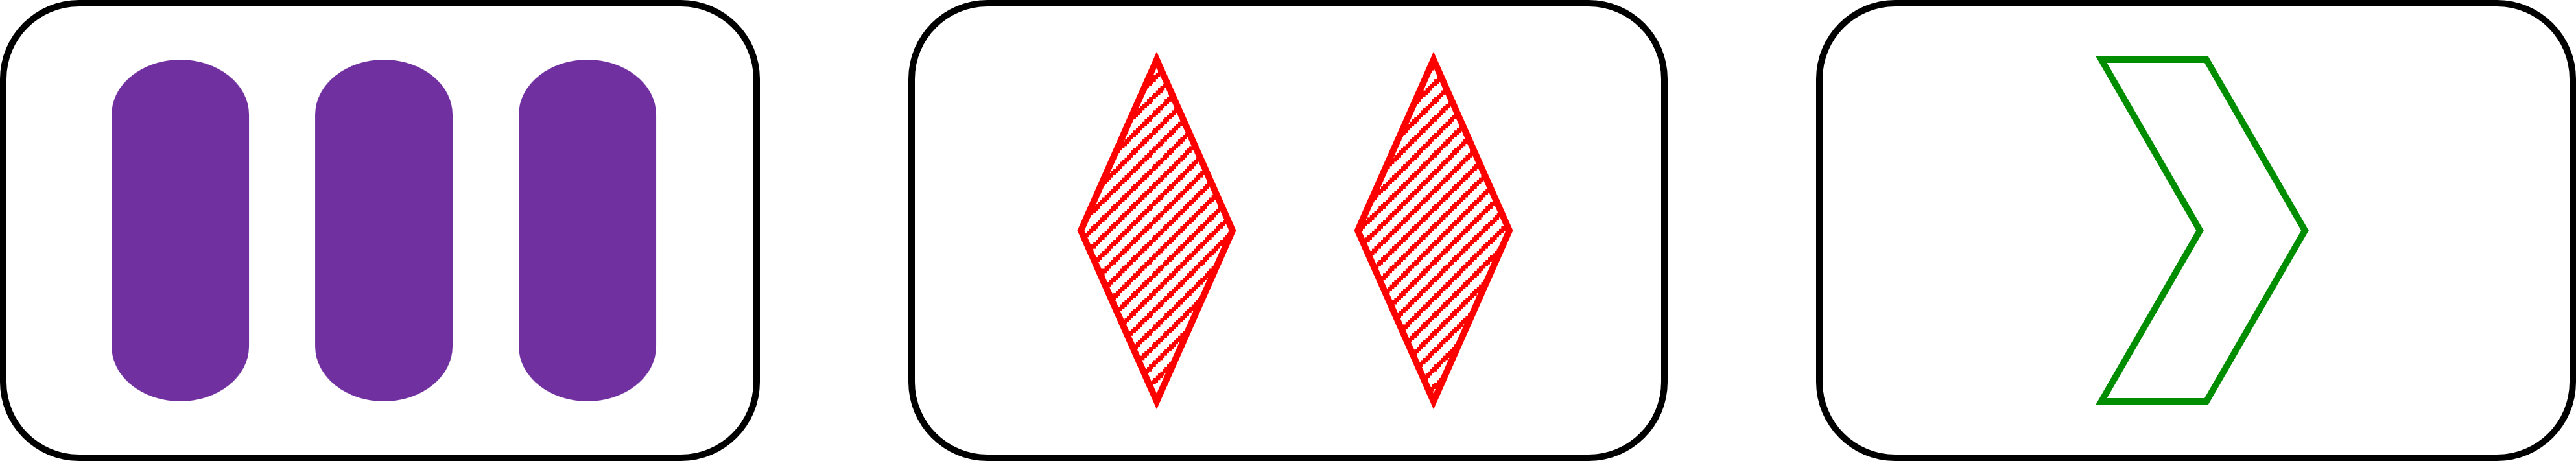

--------------

Diremos que tres cartas son adecuadas en una cualidad (Por ejemplo, que son adecuadas en la cualidad de color) si tal cualidad es la misma en las tres cartas o si las tres cartas son distintas en esa cualidad. Por ejemplo, en el ejemplo 1, las tres cartas son adecuadas en la cualidad del color porque el color es distinto en las tres (De hecho, notemos que todas las cualidades son adecuadas)

**Ejemplo 2**
La siguienes cartas son adecuadas en la cualidad de relleno pues las tres tienen el mismo relleno (rayado)

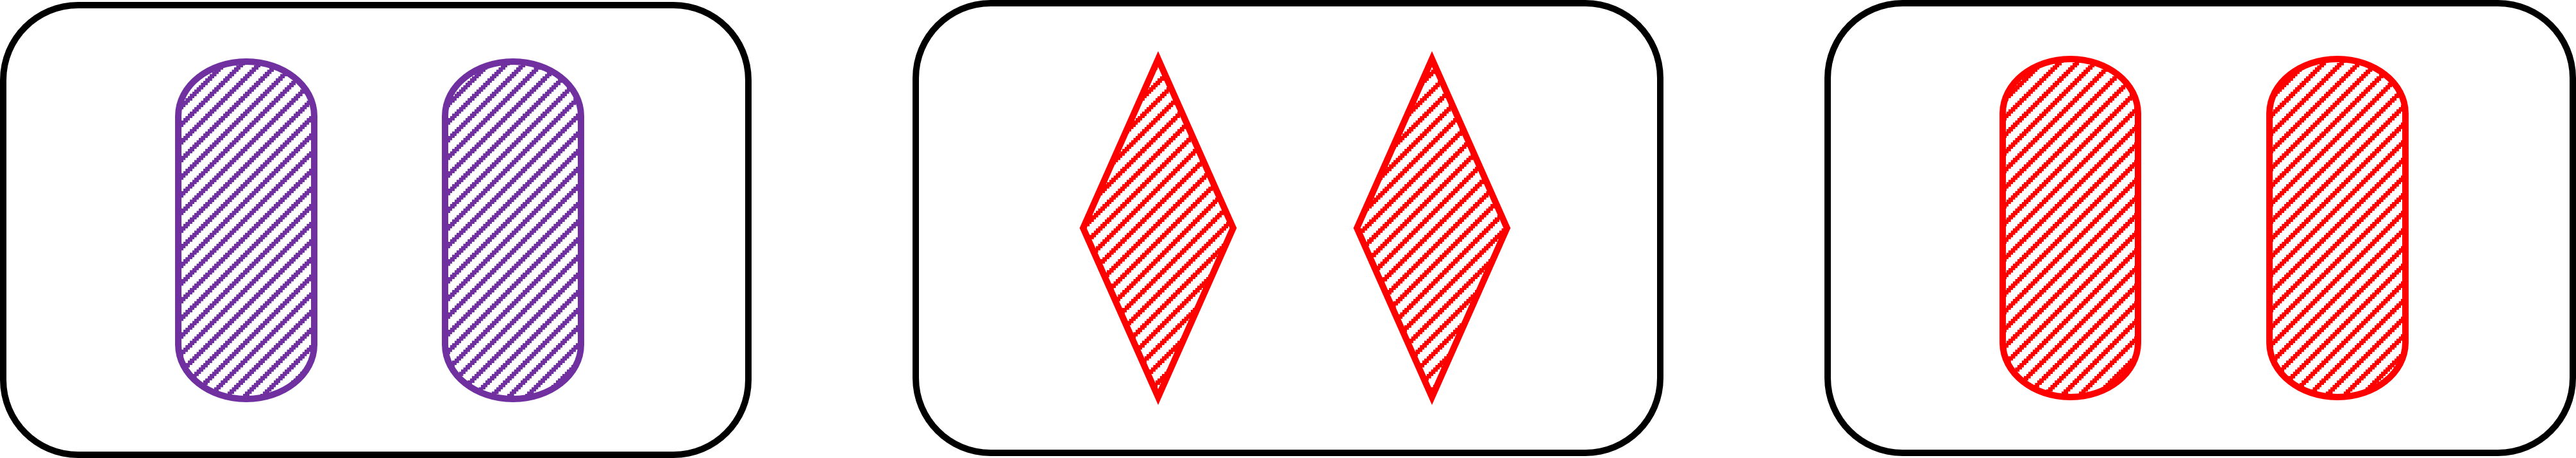

Pero notemos que estas mismas cartas también son ejemplo de cartas que NO son adecuadas en la cualidad de color pues dos de ellas son rojas y una es morada, por lo que no cumplen que la cualidad de color es igual en las tres o es distinta en las tres

**Ejemplo 3**
Las siguientes cartas son adecuadas en el número puesta las 3 tienen el número uno

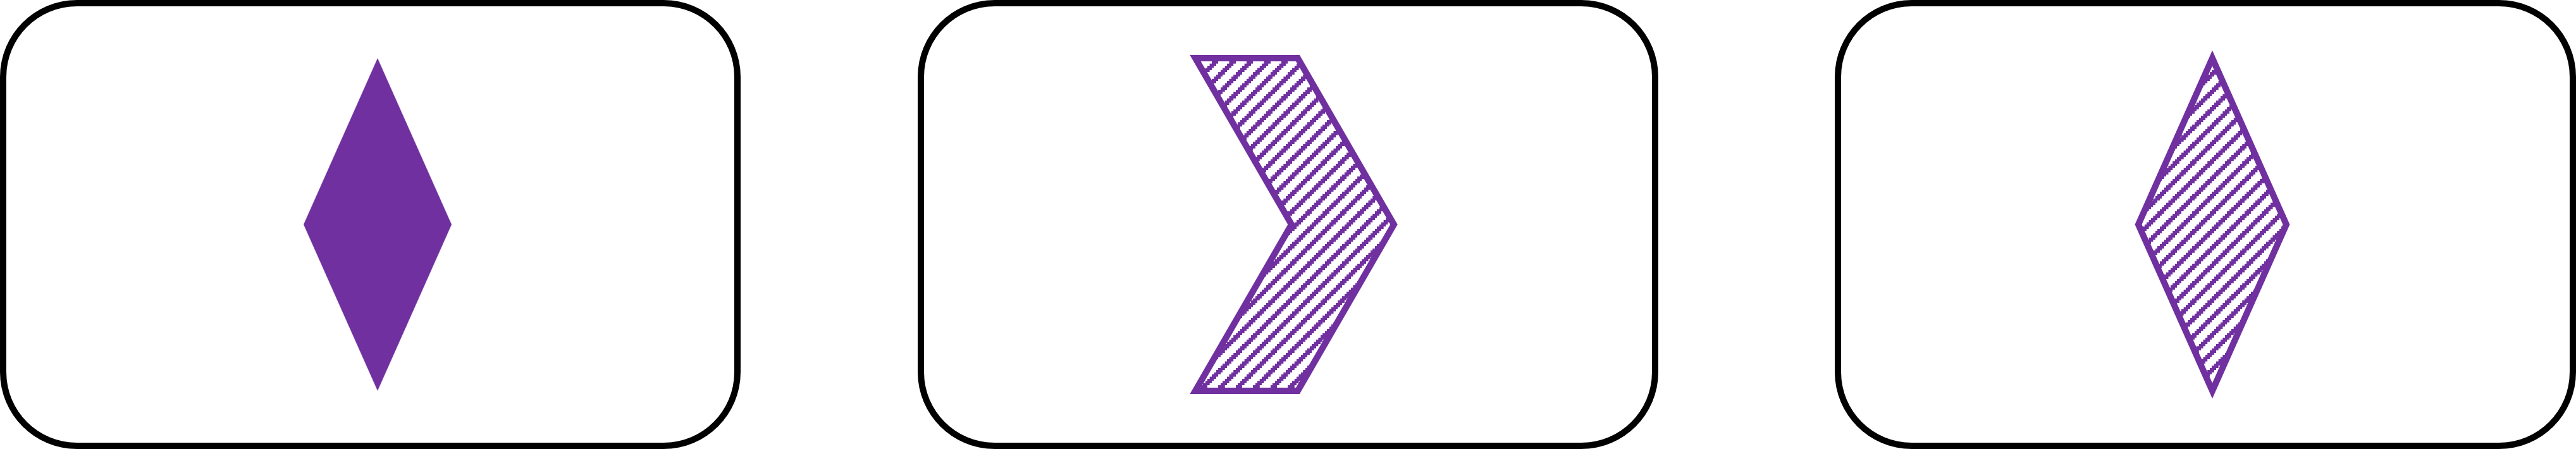

Pero esas mismas cartas no son adecuadas en la cualidad de forma pues dos de ellas son rombos y la otra es una flecha

----

Finalmente, diremos que 3 cartas forman un SET si son adecuadas en las 4 cualidades, por ejemplo las siguientes cartas son adecuadas en las cuatro cualidades

**Ejemplo 4**

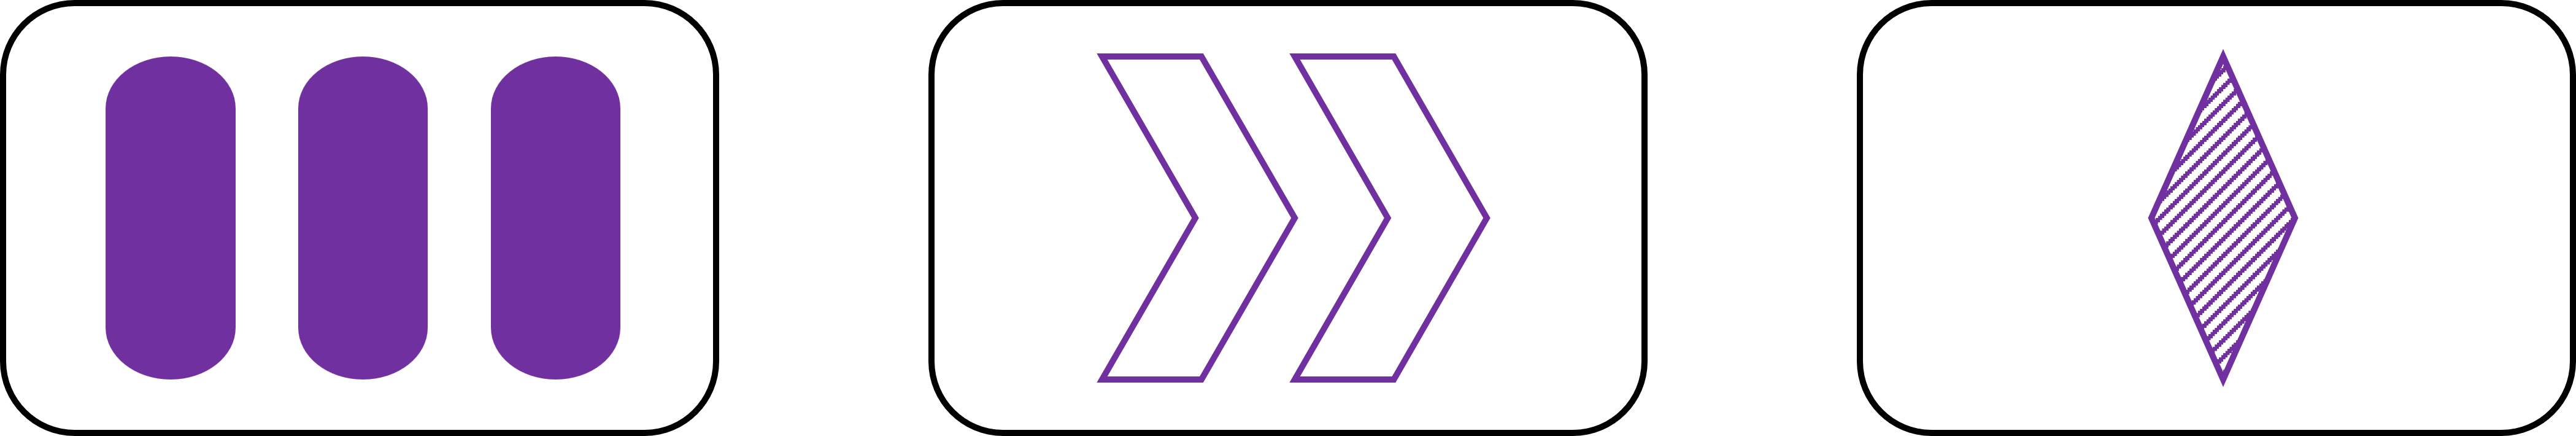

Igual las 3 cartas del ejemplo 1 forman un set pues en todas las cualidades todas las cartas son distintas

-----------------------------------


La finalidad del juego cuando se juega con más personas es encontrar más sets que los demás, pero cuando se juega en solitario, el objetivo es encontrar el mayor número de sets en el menor tiempo posible

De esta manera, para emular las cartas creamos una clase llamada Cartas y de ahpi creamos nuestras 81 cartas. Esta clase tiene como parametros las cuatro cualidades de las cartas (número, color, forma y relleno) y las siguientes cualidades



*   imagen: Tal parametro es donde se pasa el nombre de la imagen que lo representara en el tablero
*   coor_x: Coordena de eje x de donde aparecerá la carta y está preestablecida en 0 pues tal parametro no lo decidiremos nosotros, sino el juego
*   coor_y: Coordena de eje y donde aparecerá la carta. La misma situación que con coor_x

Además, tiene cualidades que no son parametros los cuales son "rect"  el cual es un rectangulo que aparecera en la misma pocisión que la carta cuando sea necesario y nos ayudara a saber si la carta fue seleccionada y 3 banderas que serán auxiliares para los métodos






In [ ]:
class Cartas(pygame.sprite.Sprite):
    def __init__(self, numero, color, forma, relleno, imagen, coor_x = 0, coor_y = 0):
        super().__init__
        self.numero = numero
        self.color = color
        self.forma = forma
        self.relleno = relleno
        self.imagen = pygame.image.load(imagen) # Descargamos la imagen que reprenta la carta
        self.coor_x = coor_x
        self.coor_y = coor_y
        self.rect = pygame.Rect(self.coor_x, self.coor_y, 237, 164)
        self.visible = False
        self.estar = True
        self.recuadro = True # Banderas

    # Al llamar a este metodo ponemos la imagen de la carta en la pantalla
    def draw_image(self, screen):
        if self.estar:
            screen.blit(self.imagen, (self.coor_x, self.coor_y))

    # Al llamar este metodo, se dibuja un recuadro que simula que la carta fue escogida
    def show_select(self, screen):
        if self.visible:
            pygame.draw.rect(screen, (135,206,250), (self.coor_x-5,self.coor_y-5,248,174), border_radius = 30)

    # Es metodo revisa si la carta fue clikeada
    def checkpoint(self, x, y):
        # collidepoint revisa si el el punto (x,y) está en self.rect
        if self.recuadro:
            return self.rect.collidepoint(x, y)
        else:
            return False

Entonces al tener las cartas como objetos unificados podemos trabajar con ellos, lo primero que hacemos es una función que al recibir una lista de cartas, hace 4 listas, cada una guardando un tipo especifico de cualidad de las cartas y nos devuelve una lista con tales listas

In [ ]:
def subsets(terna):
    numbers = [terna[i].numero for i in range(3)]
    colors = [terna[i].color for i in range(3)]
    shapes = [terna[i].forma for i in range(3)]
    fill = [terna[i].relleno for i in range(3)]
    subset = [numbers, colors, shapes, fill]

    return subset

Entonces, en este momento al pasar una lista con tres cartas por la función subsets, esta pone en una lista los números, en otro los colores, en otra las formas y en otra el relleno

Notemos que por como definimos que tres cartas sean adecudas, si las listas de tales cualidades las convertimos en conjuntos, el único caso donde las cartas no son adecuadas en la cualidad es cuando el tamaño del conjunto es exactamente 2, pues eso quiere decir que entre las 3 cartas hay 2 diferentes de la cualidad, pero para ser adecuada debe ser solo 1 (todos iguales en la cualidad) o ser 3 (todos distintos en la cualidad), entonces hacemos la siguiente función que devuelve 0 si el tamaño es 2 y 1 si el tamaño es 1 o 3 (0 si NO son adecuadas y 1 SI son adecuadas)

In [ ]:
def adecuada(conjunto):
    if len(set(conjunto)) == 2:
        return 0
    else:
        return 1

De esta forma, si pasamos las 4 listas generadas por la función subsets y sumamos los valores, las 3 cartas solo seran set si la suma es 4 pues tal cosa nos dice que las 4 cualidades fueron adecuadas. Con esto realizamos la función verificadora que nos dice si una lista de 3 cartas es set o no

In [ ]:
def verificadora(terna):
    check = subsets(terna)
    contador = 0
    for lista in check:
        contador = contador + adecuada(set(lista))
    if contador == 4:
        # Es set
        return True
    else:
        # No es set
        return False